**Linear GAM**

In [2]:
pip install pygam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s


In [19]:
#Sample Data

np.random.seed(42)

n = 300
x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(0, 5, n)

y = np.sin(x1) + 0.4 * x2**2 + np.random.normal(0, 0.5, n)

X = np.column_stack((x1, x2))



In [20]:
#Linear GAM
gam = LinearGAM(
    s(0) + s(1)
)
gam.fit(X, y)



LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)

In [21]:
gam = LinearGAM(s(0) + s(1))
gam.gridsearch(X, y)


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)

In [22]:
#Model Summary

gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.4289
Link Function:                     IdentityLink Log Likelihood:                                  -216.8521
Number of Samples:                          300 AIC:                                               460.562
                                                AICc:                                             461.9191
                                                GCV:                                                0.2798
                                                Scale:                                               0.509
                                                Pseudo R-Squared:                                   0.9761
Feature Function                  Lam

/tmp/ipython-input-2748257495.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


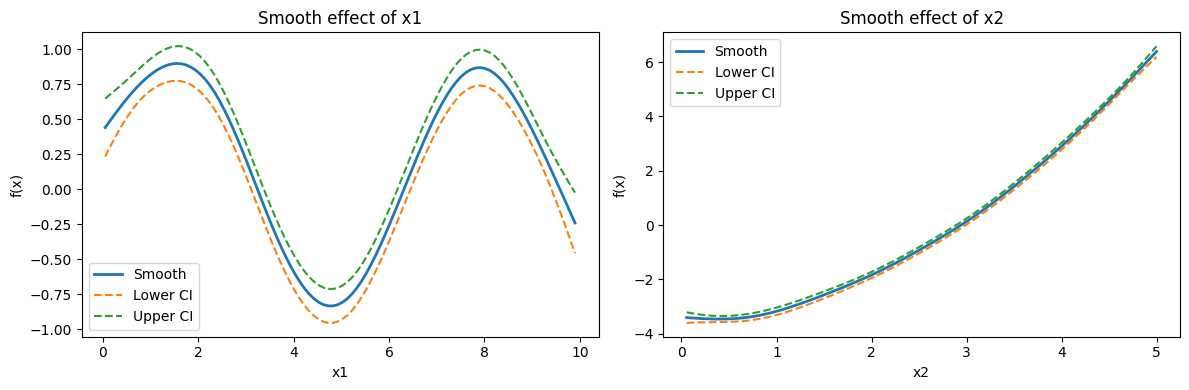

In [24]:
#Plot

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)

    pdep, confi = gam.partial_dependence(
        term=i,
        X=XX,
        width=0.95
    )

    ax.plot(XX[:, i], pdep, lw=2, label="Smooth")
    ax.plot(XX[:, i], confi[:, 0], ls='--', label="Lower CI")
    ax.plot(XX[:, i], confi[:, 1], ls='--', label="Upper CI")

    ax.set_title(f"Smooth effect of x{i+1}")
    ax.set_xlabel(f"x{i+1}")
    ax.set_ylabel("f(x)")
    ax.legend()

plt.tight_layout()
plt.show()

